In [ ]:
#Connect colab with gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Restoration of session pickle in order to have availability of the variables obtain in preprocessing
import dill
dill.load_session('/content/drive/MyDrive/session.pkl')

3.1. Image Augmentation

For this iteration over the CNN we are going to implement Image Augmentation in order to improve model performance 

In [ ]:
#Imports of ImageDataGenerator from Keras and load_model
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
#Creating Image generator for train and validation. It is a function that generates modifications in the current dataset
train_gen = ImageDataGenerator(rescale=1, zoom_range=0.4, rotation_range=50,
                               width_shift_range=0.2, height_shift_range=0.3, 
                               shear_range=0.2, horizontal_flip=True, 
                               fill_mode='nearest')
val_gen = ImageDataGenerator(rescale=1)

In [ ]:
train_gen_imgs = train_gen.flow(Xtrain, ytrain, batch_size=30)
val_gen_imgs = val_gen.flow(Xval, yval, batch_size=20)

In [ ]:
#Storing a copy of model_2 in another variable to impplement image generation.
model_3 = keras.models.load_model('/content/drive/MyDrive/saved_model/model_2.h5')

In [ ]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [ ]:
history_3 = model_3.fit(train_gen_imgs,         
         epochs=30,
         validation_steps=50,
         validation_data=val_gen_imgs)

Epoch 1/30
1800/1800 [==============================] - 53s 12ms/step - loss: 1.8274 - accuracy: 0.3383 - val_loss: 0.7636 - val_accuracy: 0.7020
Epoch 2/30
1800/1800 [==============================] - 21s 11ms/step - loss: 1.3950 - accuracy: 0.4819 - val_loss: 0.7964 - val_accuracy: 0.6840
Epoch 3/30
1800/1800 [==============================] - 21s 11ms/step - loss: 1.2743 - accuracy: 0.5227 - val_loss: 0.7873 - val_accuracy: 0.6940
Epoch 4/30
1800/1800 [==============================] - 21s 12ms/step - loss: 1.2235 - accuracy: 0.5475 - val_loss: 1.1440 - val_accuracy: 0.5860
Epoch 5/30
1800/1800 [==============================] - 21s 12ms/step - loss: 1.1790 - accuracy: 0.5652 - val_loss: 0.9129 - val_accuracy: 0.6680
Epoch 6/30
1800/1800 [==============================] - 21s 11ms/step - loss: 1.1593 - accuracy: 0.5670 - val_loss: 0.8462 - val_accuracy: 0.6610
Epoch 7/30
1800/1800 [==============================] - 21s 12ms/step - loss: 1.1354 - accuracy: 0.5780 - val_loss: 0.8286 -

As we can see, image augmentation has not improve performance, most likely due to overfitting 

In [ ]:
def plot_performance(history, epochs_no, epochs_step):
  f, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(16, 4))
  t = f.suptitle('Model Performance', fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,epochs_no+1))
  ax_1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
  ax_1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy', color='red')
  ax_1.set_xticks(np.arange(0, epochs_no+1, epochs_step))
  ax_1.set_ylabel('Accuracy Value')
  ax_1.set_xlabel('Epoch')
  ax_1.set_title('Accuracy')
  l1 = ax_1.legend(loc="best")

  ax_2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax_2.plot(epoch_list, history.history['val_loss'], label='Validation Loss', color='red')
  ax_2.set_xticks(np.arange(0, epochs_no+1, epochs_step))
  ax_2.set_ylabel('Loss Value')
  ax_2.set_xlabel('Epoch')
  ax_2.set_title('Loss')
  l2 = ax_2.legend(loc="best")

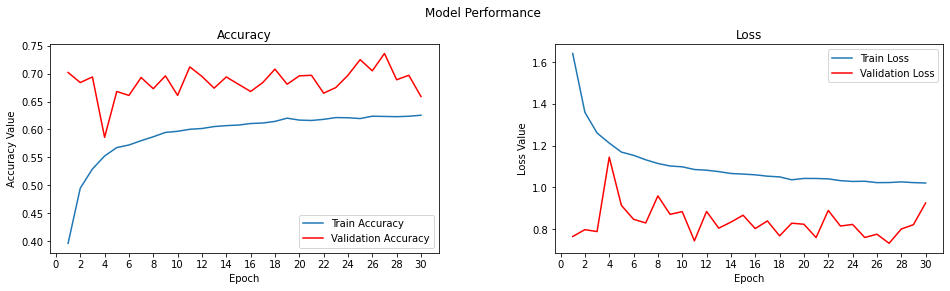

In [ ]:
plot_performance(history_3, 30, 2)


In above plots we can check taht using image augmentation with current dataset, generates overfitting, although validation and loss accuracy are decent. 

3.2. Model improvement 

Let's iterate once again in adding features for our model for increase performance, using the same scheme than in model_2 creation, so to say, adding Convolutional layers, Dropout and MaxPooling.

The hypothesis for increasing performance is that adding nodes and and then flatten the output of convolution for Dense layers will increase accuracy.


In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import optimizers

In [ ]:
#Storing the model in a new variable
model_4 = Sequential()

In [ ]:



model_4.add(Conv2D(16, kernel_size=2, activation='relu', 
                 input_shape=(28,28,1)))
model_4.add(MaxPooling2D(pool_size=1))

model_4.add(Conv2D(64, kernel_size=2, activation='relu',padding='same'))
model_4.add(MaxPooling2D(pool_size=1))

model_4.add(Conv2D(128, kernel_size=2, activation='relu',padding='same'))
model_4.add(MaxPooling2D(pool_size=1))

model_4.add(Conv2D(128, kernel_size=2, activation='relu',padding='same'))
model_4.add(MaxPooling2D(pool_size=1))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10, activation='sigmoid'))


In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       6

In [ ]:
model_4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [ ]:
#We will increase epochs reasonably for balance accuracy and processing time.
history_4=model_4.fit(Xtrain,ytrain, batch_size=96,
              epochs=50, validation_data=(Xval,yval))

Epoch 1/50
563/563 [==============================] - 60s 47ms/step - loss: 0.4935 - accuracy: 0.7305 - val_loss: 0.0565 - val_accuracy: 0.8910
Epoch 2/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0499 - accuracy: 0.9087 - val_loss: 0.0470 - val_accuracy: 0.9122
Epoch 3/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0352 - accuracy: 0.9362 - val_loss: 0.0497 - val_accuracy: 0.9130
Epoch 4/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0256 - accuracy: 0.9554 - val_loss: 0.0468 - val_accuracy: 0.9152
Epoch 5/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0190 - accuracy: 0.9681 - val_loss: 0.0729 - val_accuracy: 0.9052
Epoch 6/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0146 - accuracy: 0.9765 - val_loss: 0.0692 - val_accuracy: 0.9193
Epoch 7/50
563/563 [==============================] - 27s 48ms/step - loss: 0.0115 - accuracy: 0.9826 - val_loss: 0.0622 - val_accuracy:

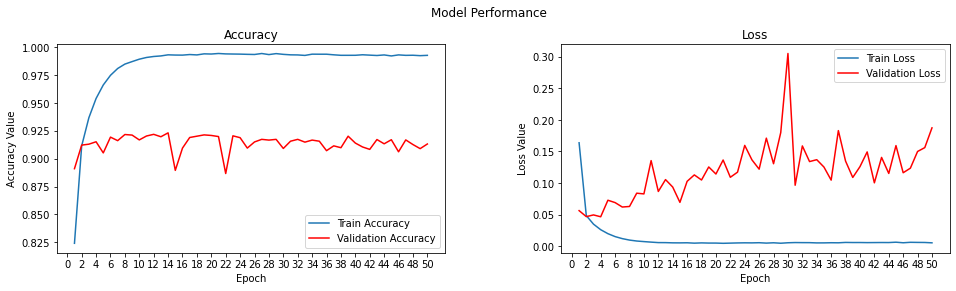

In [ ]:
plot_performance(history_4, 50, 2)

Accuracy and validation loss has improve as a result of sequential model improvement

In [ ]:
#Storing model in gdrive for transfer learning in order to test and production
model_4.save('/content/drive/MyDrive/saved_model/model_4.h5')